In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df_2012 = pd.read_csv("Exchange_Rate_Report_2012.csv")
df_2013 = pd.read_csv("Exchange_Rate_Report_2013.csv")
df_2014 = pd.read_csv("Exchange_Rate_Report_2014.csv")
df_2015 = pd.read_csv("Exchange_Rate_Report_2015.csv")
df_2016 = pd.read_csv("Exchange_Rate_Report_2016.csv")
df_2017 = pd.read_csv("Exchange_Rate_Report_2017.csv")
df_2018 = pd.read_csv("Exchange_Rate_Report_2018.csv")
df_2019 = pd.read_csv("Exchange_Rate_Report_2019.csv")
df_2020 = pd.read_csv("Exchange_Rate_Report_2020.csv")
df_2021 = pd.read_csv("Exchange_Rate_Report_2021.csv")
df_2022 = pd.read_csv("Exchange_Rate_Report_2022.csv")

# Merge all the data into a single DataFrame
frames = [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
full_data = pd.concat(frames, axis=0, ignore_index=True)

In [143]:
# Reset the index to make 'Date' a column again
full_data.reset_index(inplace=True)

# Convert 'Date' column to datetime
full_data['Date'] = pd.to_datetime(full_data['Date'], format='%d-%b-%y')

# Sort the DataFrame by 'Date'
full_data.sort_values(by='Date', inplace=True)

# Set 'Date' as the index
full_data.set_index('Date', inplace=True)

# Removing whitespaces in column names
full_data.columns = full_data.columns.str.strip()
# Assuming your DataFrame is named 'full_data'
full_data.columns = full_data.columns.str.replace(r'\s+\(', '(', regex=True)



# Handle missing values if necessary (e.g., forward fill, backward fill, interpolate)
# full_data = full_data.ffill()  # Forward fill missing values
full_data = full_data.interpolate()  # Interpolate missing values

# Check for missing values again
#print(full_data.isnull().sum())


In [144]:
full_data

,index,Algerian dinar(DZD),Australian dollar(AUD),Bahrain dinar(BHD),Bolivar Fuerte(VEF),Botswana pula(BWP),Brazilian real(BRL),Brunei dollar(BND),Canadian dollar(CAD),Chilean peso(CLP),...,Swedish krona(SEK),Swiss franc(CHF),Thai baht(THB),Trinidadian dollar(TTD),Tunisian dinar(TND),U.A.E. dirham(AED),U.K. pound(GBP),U.S. dollar(USD),Uruguayan peso(UYU),Bolivar Soberano(VES)
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,0,NaN,0.971440,0.376,NaN,NaN,1.8485,1.2925,1.0090,518.20,...,NaN,0.9334,NaN,NaN,1.49870,3.6725,0.640574,1,19.7000,NaN
2012-01-04,1,NaN,0.965904,0.376,4.2893,7.490637,1.8304,1.2874,1.0135,514.34,...,6.8152,0.9384,31.463,6.4062,1.49420,3.6725,0.641190,1,19.6890,NaN
2012-01-05,2,NaN,0.968711,0.376,4.2893,7.530120,1.8432,1.2883,1.0197,512.23,...,6.8493,0.9492,31.557,6.3886,1.49510,3.6725,0.644330,1,19.7070,NaN
2012-01-06,3,76.3243,0.978378,0.376,4.2893,7.530120,1.8416,1.2923,1.0232,511.80,...,6.8860,0.9516,31.637,6.3994,1.50460,3.6725,0.645245,1,19.6785,NaN
2012-01-09,4,76.5183,0.983284,0.376,4.2893,7.530120,1.8442,1.2994,1.0272,509.54,...,6.9227,0.9520,31.793,6.3931,1.51450,3.6725,0.647585,1,19.6500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,2643,141.0594,1.450958,0.376,248209.9200,12.787724,5.1703,1.3927,1.3035,945.35,...,10.6251,0.9587,35.938,6.7687,2.99612,3.6725,0.847170,1,40.4310,562.57005
2022-08-23,2644,141.2180,1.454122,0.376,248209.9200,12.836970,5.1024,1.3971,1.2972,945.47,...,10.7180,0.9667,36.226,6.7560,2.99612,3.6725,0.850051,1,40.3690,562.57005
2022-08-24,2645,140.9474,1.448226,0.376,248209.9200,12.836970,5.1044,1.3955,1.2983,926.94,...,10.6617,0.9640,36.162,6.7701,2.99612,3.6725,0.849185,1,40.4010,562.57005


22:18:05 - cmdstanpy - INFO - Chain [1] start processing
22:18:07 - cmdstanpy - INFO - Chain [1] done processing


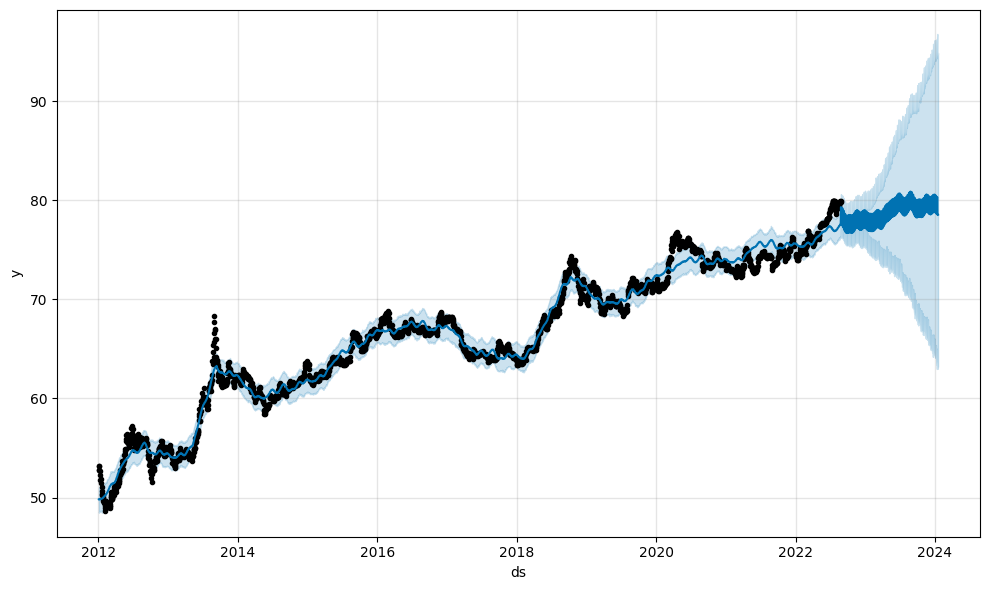

In [148]:
from prophet import Prophet

# Assuming your DataFrame is named 'full_data'
# Assuming the index is your 'Date' column
full_data.reset_index(inplace=True)

# Choose a target currency for prediction (e.g., 'USD')
target_currency = 'Indian rupee(INR)'

# Select the relevant columns for the model
selected_columns = ['Date', target_currency]
df_prophet = full_data[selected_columns].copy()

# Rename columns to 'ds' and 'y'
df_prophet.rename(columns={'Date': 'ds', target_currency: 'y'}, inplace=True)

# Initialize and fit the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create a dataframe with future dates for prediction
future = model_prophet.make_future_dataframe(periods=len(X_test))

# Make predictions
forecast = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast)


In [149]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,50.464086,48.478048,50.991505,50.464086,50.464086,-0.630838,-0.630838,-0.630838,-0.484888,-0.484888,-0.484888,-0.145950,-0.145950,-0.145950,0.0,0.0,0.0,49.833248
1,2012-01-04,50.490462,48.569112,51.001012,50.490462,50.490462,-0.640937,-0.640937,-0.640937,-0.474620,-0.474620,-0.474620,-0.166318,-0.166318,-0.166318,0.0,0.0,0.0,49.849525
2,2012-01-05,50.516839,48.589074,50.968437,50.516839,50.516839,-0.679580,-0.679580,-0.679580,-0.491185,-0.491185,-0.491185,-0.188395,-0.188395,-0.188395,0.0,0.0,0.0,49.837259
3,2012-01-06,50.543216,48.595620,51.113894,50.543216,50.543216,-0.716142,-0.716142,-0.716142,-0.504321,-0.504321,-0.504321,-0.211821,-0.211821,-0.211821,0.0,0.0,0.0,49.827074
4,2012-01-09,50.622346,48.544637,51.016986,50.622346,50.622346,-0.807329,-0.807329,-0.807329,-0.520888,-0.520888,-0.520888,-0.286441,-0.286441,-0.286441,0.0,0.0,0.0,49.815018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2024-01-14,79.489023,64.910578,96.782887,64.281021,95.449393,0.833335,0.833335,0.833335,1.237950,1.237950,1.237950,-0.404615,-0.404615,-0.404615,0.0,0.0,0.0,80.322358
3154,2024-01-15,79.493341,63.232150,94.364571,64.222615,95.527297,-0.945789,-0.945789,-0.945789,-0.520888,-0.520888,-0.520888,-0.424901,-0.424901,-0.424901,0.0,0.0,0.0,78.547552
3155,2024-01-16,79.497659,63.001991,94.648749,64.164209,95.605409,-0.928582,-0.928582,-0.928582,-0.484888,-0.484888,-0.484888,-0.443694,-0.443694,-0.443694,0.0,0.0,0.0,78.569077
3156,2024-01-17,79.501977,63.134363,94.742514,64.105803,95.652511,-0.935549,-0.935549,-0.935549,-0.474620,-0.474620,-0.474620,-0.460929,-0.460929,-0.460929,0.0,0.0,0.0,78.566428


In [150]:
forecast.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3058,2023-10-11,79.078800,67.929803,90.061985,68.076818,90.687747,-0.698975,-0.698975,-0.698975,-0.474620,-0.474620,-0.474620,-0.224355,-0.224355,-0.224355,0.0,0.0,0.0,78.379825
3059,2023-10-12,79.083118,67.469977,90.338208,68.037382,90.736581,-0.718734,-0.718734,-0.718734,-0.491185,-0.491185,-0.491185,-0.227549,-0.227549,-0.227549,0.0,0.0,0.0,78.364384
3060,2023-10-13,79.087436,67.796788,89.947319,68.015152,90.789099,-0.736601,-0.736601,-0.736601,-0.504321,-0.504321,-0.504321,-0.232280,-0.232280,-0.232280,0.0,0.0,0.0,78.350835
3061,2023-10-14,79.091754,69.114841,91.491234,68.047702,90.844631,0.999476,0.999476,0.999476,1.237950,1.237950,1.237950,-0.238474,-0.238474,-0.238474,0.0,0.0,0.0,80.091230
3062,2023-10-15,79.096073,68.866080,91.919654,68.080252,90.903578,0.991963,0.991963,0.991963,1.237950,1.237950,1.237950,-0.245987,-0.245987,-0.245987,0.0,0.0,0.0,80.088035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2024-01-14,79.489023,64.910578,96.782887,64.281021,95.449393,0.833335,0.833335,0.833335,1.237950,1.237950,1.237950,-0.404615,-0.404615,-0.404615,0.0,0.0,0.0,80.322358
3154,2024-01-15,79.493341,63.232150,94.364571,64.222615,95.527297,-0.945789,-0.945789,-0.945789,-0.520888,-0.520888,-0.520888,-0.424901,-0.424901,-0.424901,0.0,0.0,0.0,78.547552
3155,2024-01-16,79.497659,63.001991,94.648749,64.164209,95.605409,-0.928582,-0.928582,-0.928582,-0.484888,-0.484888,-0.484888,-0.443694,-0.443694,-0.443694,0.0,0.0,0.0,78.569077
3156,2024-01-17,79.501977,63.134363,94.742514,64.105803,95.652511,-0.935549,-0.935549,-0.935549,-0.474620,-0.474620,-0.474620,-0.460929,-0.460929,-0.460929,0.0,0.0,0.0,78.566428
